In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('premier_league_data.csv')

In [3]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1,1,D,2006-2007
1,Arsenal,Aston Villa,1,1,D,2006-2007
2,Everton,Watford,2,1,H,?
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   4560 non-null   object
 1   away_team   4560 non-null   object
 2   home_goals  4560 non-null   int64 
 3   away_goals  4560 non-null   int64 
 4   result      4560 non-null   object
 5   season      4560 non-null   object
dtypes: int64(2), object(4)
memory usage: 213.9+ KB


## Data Cleaning

#### Remove invalid values from the `season` column

In [6]:
print(df['season'].unique())

['2006-2007' '?' '2007-2008' '2008-2009' '2009-2010' '2010-2011'
 '2011-2012' '2012-2013' '2013-2014' '2014-2015' '2015-2016' '2016-2017'
 '2017-2018']


In [7]:
df['season'] = df['season'].str.replace('?','Unknown season')
df.head()

C:\Users\Shrikaran\AppData\Local\Temp\ipykernel_8888\2906640125.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['season'] = df['season'].str.replace('?','Unknown season')


,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1,1,D,2006-2007
1,Arsenal,Aston Villa,1,1,D,2006-2007
2,Everton,Watford,2,1,H,Unknown season
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007


#### Identify invalid values in goals scored

<AxesSubplot:>

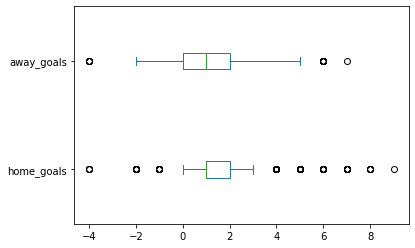

In [8]:
df[['home_goals','away_goals']].plot(kind='box',vert=False)

In [9]:
df.loc[df['home_goals'] < 0, 'home_goals'].count()

34

In [10]:
df.loc[df['away_goals'] < 0, 'away_goals'].count()

39

#### Replace invalid goals for 0

In [11]:
df.loc[df['home_goals'] < 0, 'home_goals'] = 0

In [12]:
df.loc[df['away_goals'] < 0, 'away_goals'] = 0

#### Identify and clean invalid results in the `result` column

In [13]:
df['result'].value_counts()

H    2088
A    1278
D    1151
?      43
Name: result, dtype: int64

In [14]:
df.loc[df['home_goals'] > df['away_goals'], 'result'] = 'H'

In [15]:
df.loc[df['home_goals'] < df['away_goals'], 'result'] = 'A'

In [16]:
df.loc[df['home_goals'] == df['away_goals'], 'result'] = 'D'

In [17]:
df['result'].value_counts()

H    2107
A    1294
D    1159
Name: result, dtype: int64

## Analysis

#### What's the average number of goals per match?

In [18]:
(df['home_goals'] + df['away_goals']).mean()

2.6633771929824563

#### Create a new column `total_goals`

In [19]:
df['total_goals'] = df['home_goals'] + df['away_goals']
df['total_goals'].head()

0    2
1    2
2    3
3    3
4    3
Name: total_goals, dtype: int64

#### Calculate average goals per season

In [20]:
df.groupby('season')['total_goals'].mean().sort_index()

season
2006-2007         2.429799
2007-2008         2.618421
2008-2009         2.463158
2009-2010         2.747368
2010-2011         2.797368
2011-2012         2.763158
2012-2013         2.773684
2013-2014         2.718421
2014-2015         2.500000
2015-2016         2.676316
2016-2017         2.794737
2017-2018         2.678947
Unknown season    2.419355
Name: total_goals, dtype: float64

#### What's the biggest goal difference in a match?

In [21]:
(df['home_goals'] - df['away_goals']).abs().max()


8

#### What's the team with most away wins?

In [22]:
df.loc[df['result'] == 'A'].groupby('away_team')['result'].count().sort_values(ascending=False).head()

away_team
Chelsea              120
Manchester United    117
Arsenal              103
Liverpool             98
Manchester City       98
Name: result, dtype: int64

#### What's the team with the most goals scored at home?

In [23]:
df.groupby('home_team')['home_goals'].sum().sort_values(ascending=False).head()

home_team
Manchester City      499
Manchester United    495
Chelsea              488
Arsenal              471
Liverpool            459
Name: home_goals, dtype: int64

#### What's the team that has conceded the least amount of goals while playing at home?

In [24]:
df.groupby('home_team')['away_goals'].mean().sort_values().head()

home_team
Manchester United    0.692982
Liverpool            0.789474
Arsenal              0.802632
Chelsea              0.802632
Manchester City      0.815789
Name: away_goals, dtype: float64

#### What's the team with most goals scored playing as a visitor (away from home)?

In [25]:
df.groupby('away_team')['away_goals'].sum().sort_values(ascending=False).head()

away_team
Arsenal              379
Manchester United    366
Manchester City      359
Chelsea              357
Liverpool            348
Name: away_goals, dtype: int64